In [1]:
import numpy as np
import matplotlib.pyplot as plt
from update_utils import *
from retraction_free import *
from RDGD_tracking import *
import time

In [2]:
N = 4
m = 1000
# number of samples ?
n = 1000
# problem dim
r = 5

eig_rank = n
# rank
# max_iter = 10000

exp_num = 1
# number of experiments

In [3]:
# def ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=10000):
#     distance = []
#     N = X_0.shape[0]
#     n = X_0.shape[1]
#     r = X_0.shape[2]
    
#     lambd = 0.2
#     beta = 0.5
#     x = np.copy(X_0)
#     y = np.zeros_like(X_0)
#     grad = np.zeros_like(X_0)
#     penalty = np.zeros_like(X_0)
    
#     A_m = np.zeros((n,n))
#     for i in range(N):
#         A_m += A[i]@A[i].T
    
#     x_opt, s, v = np.linalg.svd(A_m)
#     x_opt = x_opt[:, :r]


#     for i in range(N):
#         grad[i] = A[i]@A[i].T@x[i]
#         grad[i] = proj_tangent(x[i], grad[i])
#         penalty[i] = lambd * x[i] @ (x[i].T@x[i] - np.eye(r))
#         y[i] = proj_tangent(x[i], A[i]@A[i].T@x[i])
    
#     y = np.copy(grad)
    
#     # manual first round
#     # for i in range(N):
#     #     x[i] = x[i] + proj_tangent(x[i], grad[i]) - penalty[i]
        
#     # new_x = np.zeros_like(X_0)
#     for k in range(max_iter):
#         old_grad = grad
#         old_x = x
#         old_y = y
#         old_penalty = penalty
                
#         Wx = np.zeros_like(x)
#         for i in range(N):
#             for j in range(N):
#                 # Wx[i] += W[i,j] * (old_x[j] - old_x[i])
#                 Wx[i] += W[i,j] * (old_x[j])
                
#         for i in range(N):
#             x[i] = x[i] + proj_tangent(x[i], beta*Wx[i] + step_size*y[i]) - penalty[i]
#             # x[i] = x[i] + proj_tangent(x[i], beta*Wx[i] + step_size*grad[i]) - penalty[i]
            
            
#         grad = np.zeros_like(X_0)
#         for i in range(N):
#             grad[i] = A[i]@A[i].T@x[i]
#             grad[i] = proj_tangent(x[i], grad[i])
#             penalty[i] = lambd * x[i] @ (x[i].T@x[i] - np.eye(r))
#             # print(np.linalg.norm(x[i].T@x[i] - np.eye(r)))
#         y = np.zeros_like(old_y)
#         for i in range(N):
#             for j in range(N):
#                 y[i] += W[i,j] * old_y[j]
#             y[i] += grad[i] - old_grad[i]
#         # dist = 0
#         # for i in range(N):
#         #     dist += np.linalg.norm(x_opt-x[i])
        
#         x_bar = np.average(x, axis=0)
#         u, s, v = np.linalg.svd(x_opt.T@x_bar)
#         dist = np.sqrt(2*np.abs(r - np.sum(s)))
#         distance.append(dist)
#         if dist < 1e-6 or np.isnan(dist):
#             break
#         if k%100 == 0:
#             print("iter:", k, "dist:", dist)
#             print("average x:", np.linalg.norm(np.average(x, axis=0)-x_opt))
    
#             # return np.zeros(max_iter)
#             x_bar = np.average(x, axis=0)
#             consensus_error = 0
#             for i in range(N):
#                 consensus_error += np.linalg.norm(x[i]- x_bar)
#             print("consensus error:", consensus_error)
#             print("function value:")
#             print(np.sum(np.sum(x_bar.T@A_m@x_bar)))
#             print("dist", dist)

#     print(x_bar.T@x_bar)
#     # print("average x:")
#     # print(x_bar)
#     return np.array(distance), x_bar

In [4]:

# print(x_0.shape)
# print(X_0.shape)

A = data_gen_pca(N, n, m)
B = np.zeros((m*N, n))
for i in range(N):
    B[m*i:m+m*i] = A[i].T
print(np.linalg.norm(A))
print(np.linalg.norm(B))

U, S, V = np.linalg.svd(B, full_matrices=False)
print(U.shape, S.shape, V.shape)
for i in range(n):
    if eig_rank >= i:
    # if True:
        S[i] = S[0] * 0.8**(i)
    else:
        S[i] = 0
B = U@np.diag(S)@V
print(np.linalg.norm(B))

for i in range(N):
    A[i] = B[m*i:m+m*i,:].T
    
A_m = np.zeros((n,n))
for i in range(N):
    A_m += A[i]@A[i].T
    


1999.6701225157437
1999.670122515744
(4000, 1000) (1000,) (1000, 1000)
157.65126249745035


In [5]:
import scipy

scipy.io.savemat('file.mat', {'A_m': A_m})

In [6]:
print(A_m)


[[37.00903652 -4.68775242 -2.14707083 ...  8.47128778 -2.13193161
  -3.82445791]
 [-4.68775242 14.36262692 -8.71975357 ... -0.74575587 -3.98656753
  -2.25983572]
 [-2.14707083 -8.71975357 13.78570465 ...  4.40861972 -0.85725694
   1.34666266]
 ...
 [ 8.47128778 -0.74575587  4.40861972 ... 14.51243484  4.86345849
  -3.9388694 ]
 [-2.13193161 -3.98656753 -0.85725694 ...  4.86345849 25.15326487
  -1.88660966]
 [-3.82445791 -2.25983572  1.34666266 ... -3.9388694  -1.88660966
   6.4161112 ]]


In [7]:


# print(x_0.T@x_0)

x_opt, s, v = np.linalg.svd(A_m)
# plt.plot(s)
# x_opt = x_opt[:,:r]
x_opt = x_opt[:, :r]

# print(x_opt.T@x_opt)
print(x_opt.shape)
print(x_opt[0])

print(np.sum(np.sum(x_opt.T@A_m@x_opt)))


(1000, 5)
[-0.04115226 -0.01212579 -0.04924965  0.04964501  0.01101352]
22185.251166719514


In [8]:

graph_weight = 0.1
W = np.eye(N)
for i in range(N):
    W[i, i] -= 2*graph_weight
    W[i, (i-1)%N] += graph_weight
    W[i, (i+1)%N] += graph_weight
    
    
x_0 = np.random.randn(n, r)
x_0, _ = np.linalg.qr(x_0)

# x_0 = np.zeros_like(x_0)
# for i in range(r):
#     x_0[i,i] = 1

X_0 = np.repeat(x_0[np.newaxis], N, axis=0)


for i in range(N):
    x_0 = np.random.randn(n, r)
    x_0, _ = np.linalg.qr(x_0)
    X_0[i] = np.copy(x_0)
    
lin_term = np.random.randn(*X_0.shape)*10
lin_term = None
step_size = 0.1/m
# distance, x_bar = ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=10000)
# distance = ret_free_tracking(A, W, step_size, X_0, x_opt)    

In [9]:
# plt
    # return np.array(distance), np.array(con_errors), np.array(grad_norms), x_bar
max_iter=10000
start = time.time()
distance1, con_error1, grad_norm1, x_bar1 = ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
mid = time.time()
distance2, con_error2, grad_norm2, x_bar2 = RDGD_tracking(A, W, step_size, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
end = time.time()
# distance2, con_error2, grad_norm2, x_bar2 = ret_free_integral(A, W, step_size, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)


 14%|█▍        | 1420/10000 [02:03<12:24, 11.53it/s]


[[ 1.00000000e+00 -2.92631587e-14  7.33094141e-15  2.51936059e-14
   4.01588485e-14]
 [-2.92631587e-14  1.00000000e+00 -6.57633670e-15 -4.03427292e-14
   2.30128416e-14]
 [ 7.33094141e-15 -6.57633670e-15  1.00000000e+00 -4.84473572e-14
  -7.89299182e-16]
 [ 2.51936059e-14 -4.03427292e-14 -4.84473572e-14  1.00000000e+00
  -6.01506692e-14]
 [ 4.01588485e-14  2.30128416e-14 -7.89299182e-16 -6.01506692e-14
   1.00000000e+00]]


 14%|█▍        | 1414/10000 [03:31<21:24,  6.68it/s]

[[ 1.00000000e+00 -1.09504419e-17 -8.67361738e-18  1.69135539e-17
   2.77555756e-17]
 [-1.09504419e-17  1.00000000e+00  1.57859836e-16  3.81639165e-17
   1.00613962e-16]
 [-8.67361738e-18  1.57859836e-16  1.00000000e+00  3.46944695e-17
   1.38777878e-16]
 [ 1.69135539e-17  3.81639165e-17  3.46944695e-17  1.00000000e+00
   1.34441069e-17]
 [ 2.77555756e-17  1.00613962e-16  1.38777878e-16  1.34441069e-17
   1.00000000e+00]]


In [10]:
time1 = mid-start
time2 = end-mid

print(time1, time2)


123.27846169471741 211.65206575393677


22185.251166719514
32933.3845584246


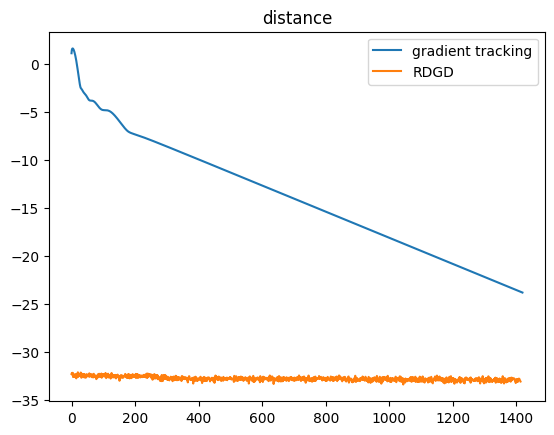

In [11]:

plt.plot(np.log(distance1), label='gradient tracking')
plt.plot(np.log(distance2), label='RDGD')


print(np.sum(np.sum(x_opt.T@A_m@x_opt)))
print(np.sum(np.sum(x_bar1.T@A_m@x_bar1)))
# print(np.sum(np.sum(x_bar2.T@A_m@x_bar2)))
plt.title("distance")
plt.legend()

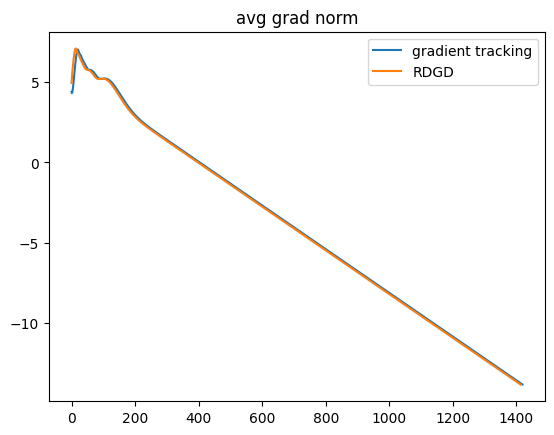

In [12]:

plt.plot(np.log(grad_norm1), label='gradient tracking')
plt.plot(np.log(grad_norm2), label='RDGD')


plt.title("avg grad norm")
plt.legend()

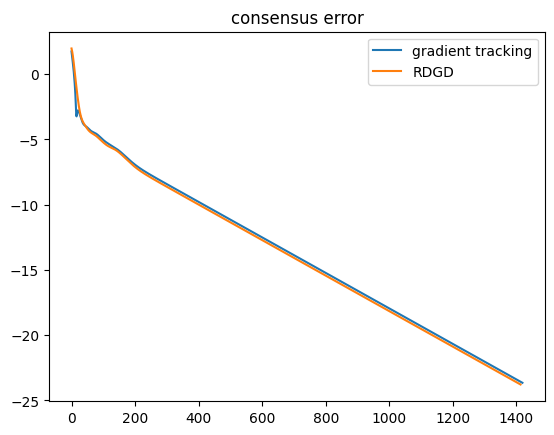

In [13]:

plt.plot(np.log(con_error1), label='gradient tracking')
plt.plot(np.log(con_error2), label='RDGD')

plt.title("consensus error")
plt.legend()

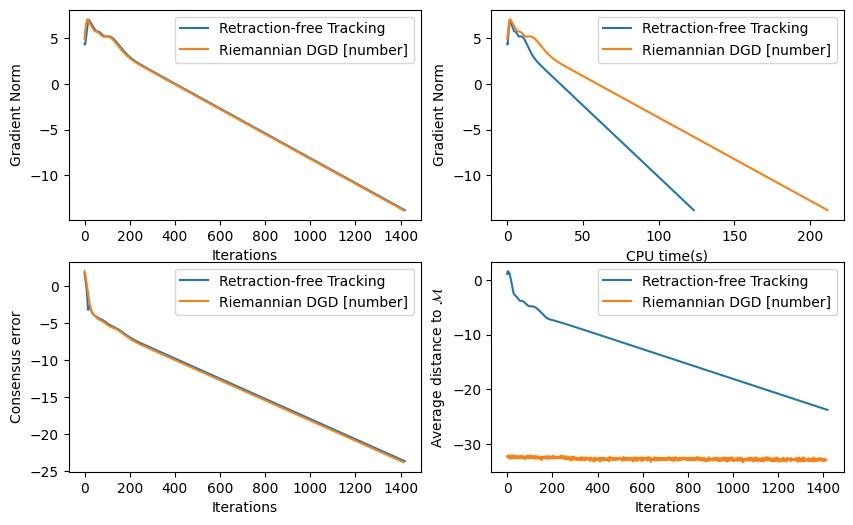

In [14]:
label1 = "Retraction-free Tracking"
label2 = "Riemannian DGD [number]"

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,6))


ax1.plot(np.log(grad_norm1), label=label1)
ax1.plot(np.log(grad_norm2), label=label2)
ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
# ax1.set_title("Optimality")
ax1.legend()

ax2.plot(np.linspace(0, time1, grad_norm1.shape[0]), np.log(grad_norm1), label=label1)
ax2.plot(np.linspace(0, time2, grad_norm2.shape[0]), np.log(grad_norm2), label=label2)
# ax2.set_ylabel("$\sum_{i\in [n]}\\text{grad} f_i(x_i)$")
ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")

# ax2.set_title("Elapsed Time")
ax2.legend()


ax3.plot(np.log(con_error1), label=label1)
ax3.plot(np.log(con_error2), label=label2)
ax3.set_ylabel("Consensus error")
ax3.set_xlabel("Iterations")
ax3.legend()



ax4.plot(np.log(distance1), label=label1)
ax4.plot(np.log(distance2), label=label2)
ax4.set_ylabel("Average distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
# ax4.set_title("distance")
ax4.legend()


# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.savefig("quad_compare.pdf")

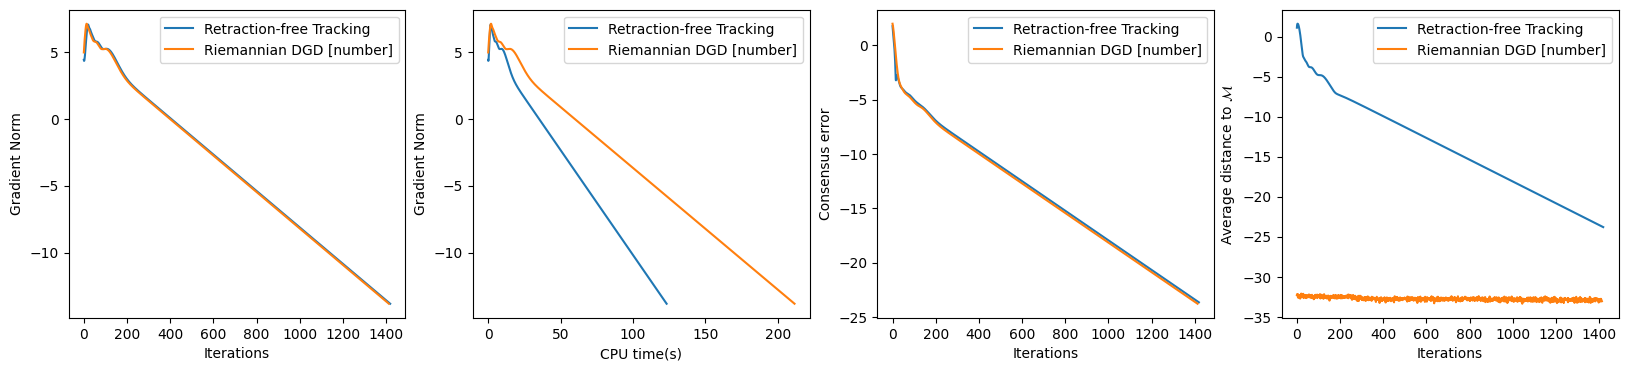

In [15]:
label1 = "Retraction-free Tracking"
label2 = "Riemannian DGD [number]"

f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(20,4))


ax1.plot(np.log(grad_norm1), label=label1)
ax1.plot(np.log(grad_norm2), label=label2)
ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
# ax1.set_title("Optimality")
ax1.legend()

ax2.plot(np.linspace(0, time1, grad_norm1.shape[0]), np.log(grad_norm1), label=label1)
ax2.plot(np.linspace(0, time2, grad_norm2.shape[0]), np.log(grad_norm2), label=label2)
# ax2.set_ylabel("$\sum_{i\in [n]}\\text{grad} f_i(x_i)$")
ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")

# ax2.set_title("Elapsed Time")
ax2.legend()


ax3.plot(np.log(con_error1), label=label1)
ax3.plot(np.log(con_error2), label=label2)
ax3.set_ylabel("Consensus error")
ax3.set_xlabel("Iterations")
ax3.legend()



ax4.plot(np.log(distance1), label=label1)
ax4.plot(np.log(distance2), label=label2)
ax4.set_ylabel("Average distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
# ax4.set_title("distance")
ax4.legend()


# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.savefig("line_compare.pdf")

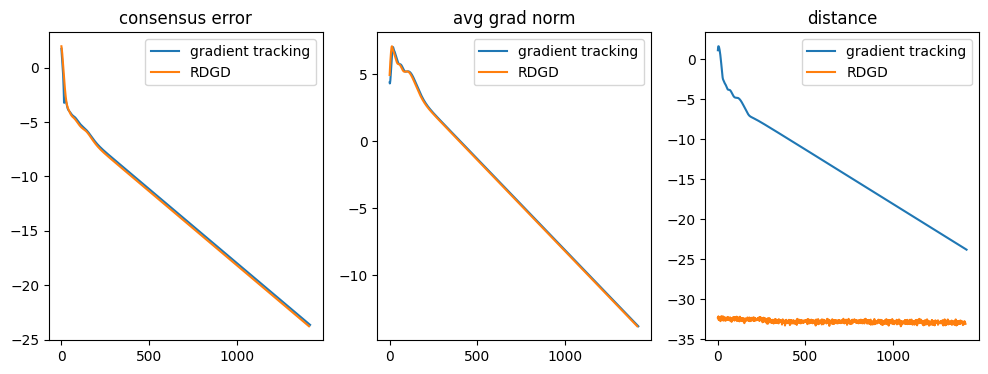

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
ax1.plot(np.log(con_error1), label='gradient tracking')
ax1.plot(np.log(con_error2), label='RDGD')

ax1.set_title("consensus error")
ax1.legend()


ax2.plot(np.log(grad_norm1), label='gradient tracking')
ax2.plot(np.log(grad_norm2), label='RDGD')
ax2.set_title("avg grad norm")
ax2.legend()

ax3.plot(np.log(distance1), label='gradient tracking')
ax3.plot(np.log(distance2), label='RDGD')
ax3.set_title("distance")
ax3.legend()


# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)

ValueError: operands could not be broadcast together with shapes (1414,) (1420,) 

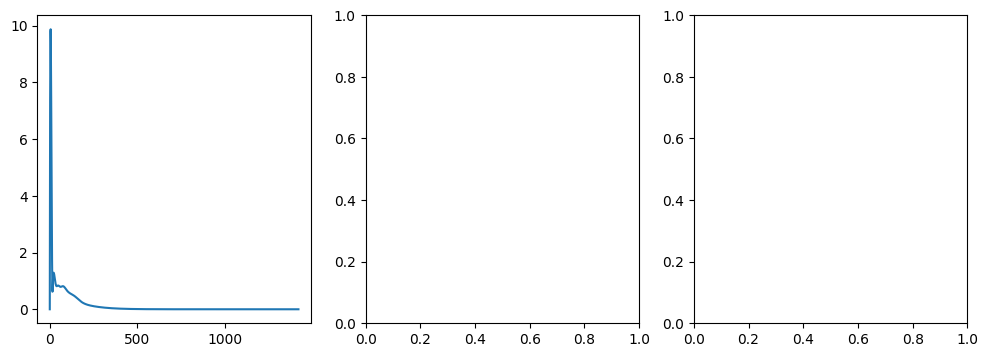

In [17]:
len = distance1.shape[0]
k_range = np.linspace(0,distance1.shape[0], distance1.shape[0])
# print(k_range.shape)
# print(distance1.shape)
# plt.plot(k_range, distance1*k_range)

# plt.plot(k_range, distance2*k_range)

# plt.ylim(0, 100)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
ax1.plot(k_range, con_error1[:len]*k_range, label='gradient tracking')
ax1.plot(k_range, (con_error2[:len])*k_range, label='integral feedback')

ax1.set_title("consensus error")
ax1.legend()


ax2.plot(k_range, (grad_norm1[:len])*k_range, label='gradient tracking')
ax2.plot(k_range, (grad_norm2[:len])*k_range, label='integral feedback')
ax2.set_title("avg grad norm")
ax2.legend()

ax3.plot(k_range, (distance1[:len])*k_range, label='gradient tracking')
ax3.plot(k_range, (distance2[:len])*k_range, label='integral feedback')
ax3.set_title("distance")
ax3.legend()